## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [11]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
values = {
    'Glucose' : pima['Glucose'].median(),
    'BloodPressure' : pima['BloodPressure'].median(),
    'SkinThickness' : pima['SkinThickness'].median(),
    'Insulin' : pima['Insulin'].median(),
    'BMI' : pima['BMI'].mean()
}
pima = pima.fillna(value=values)

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [13]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [20]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

print(f"Диабет обнаружен у {len(pima.query(expr='Age > 50 & Class == 1'))} женщин")

Диабет обнаружен у 38 женщин


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [24]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.nlargest(3, 'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [26]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
len(pima.query('Age > 30 & Age < 40 & Pregnancies >= 3'))

115

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [29]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
(len(pima.query('BloodPressure >= 80 & BloodPressure <= 89')) / len(pima)) * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [31]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

print(f"У {len(pima.query('BloodPressure >= 80 & BloodPressure <= 89 & BMI >= 30'))} женщины")

У 111 женщины


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [32]:
hasDiabet = pima.query('Class == 1')

noDiabet = pima.query('Class == 0')

In [34]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(f"Среднее значение глюкозы у людей с диабетом: {hasDiabet['Glucose'].mean()} и без него: {noDiabet['Glucose'].mean()}")


Среднее значение глюкозы у людей с диабетом: 142.13059701492537 и без него: 110.682


In [35]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(f"Среднее значение кровянного давления у людей с диабетом: {hasDiabet['BloodPressure'].mean()} и без него: {noDiabet['BloodPressure'].mean()}")

Среднее значение кровянного давления у людей с диабетом: 75.1231343283582 и без него: 70.92


In [36]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(f"Среднее значение инсулина у людей с диабетом: {hasDiabet['Insulin'].mean()} и без него: {noDiabet['Insulin'].mean()}")

Среднее значение инсулина у людей с диабетом: 164.70149253731344 и без него: 127.792


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

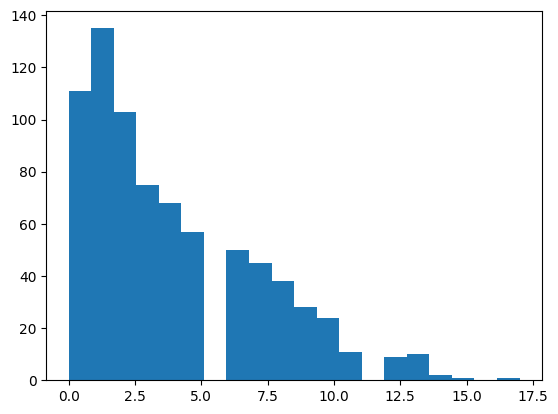

In [43]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
plt.hist(pima['Pregnancies'], bins=20)
plt.show()

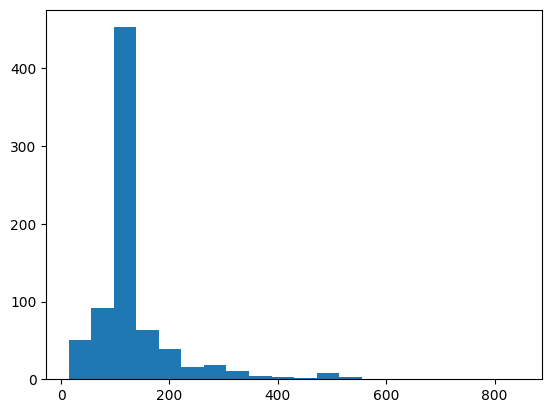

In [42]:
plt.hist(pima['Insulin'], bins=20)
plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

In [48]:
def label_function(val):
    return f'{val / 100 * len(pima):.0f}\n{val:.0f}%'

<Axes: >

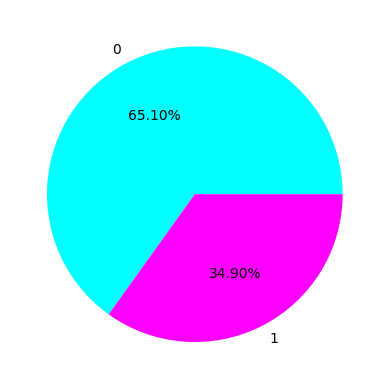

In [192]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.groupby('Class').size().plot.pie(autopct='%.2f%%', cmap='cool' )

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

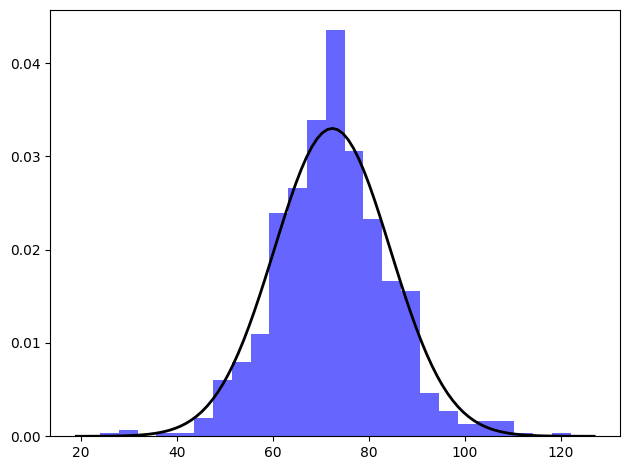

In [180]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
import numpy as np

data = pima['BloodPressure']
  
mu, std = norm.fit(data)  
  
plt.hist(data, bins=25, density=True, alpha=0.6, color='b') 

xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 

plt.plot(x, p, 'k', linewidth=2) 
plt.tight_layout()
plt.show() 


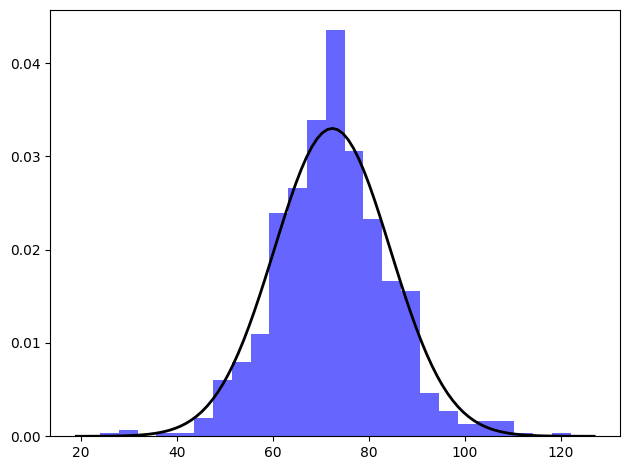

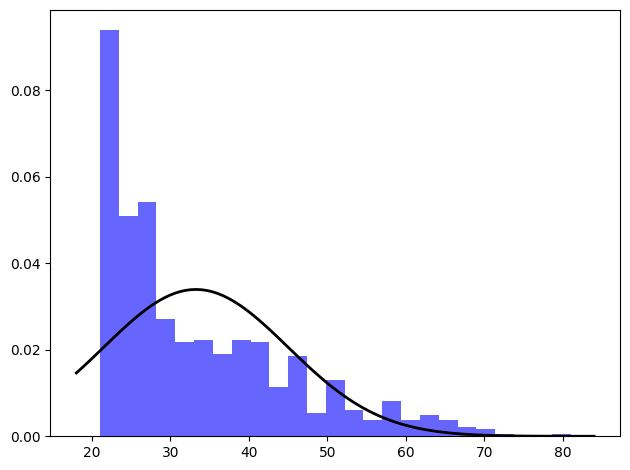

In [178]:
data = pima['Age']

mu, std = norm.fit(data)  
  
plt.hist(data, bins=25, density=True, alpha=0.6, color='b') 
  
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 

plt.plot(x, p, 'k', linewidth=2) 
plt.tight_layout() 
plt.show() 

__Задание 13.__

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

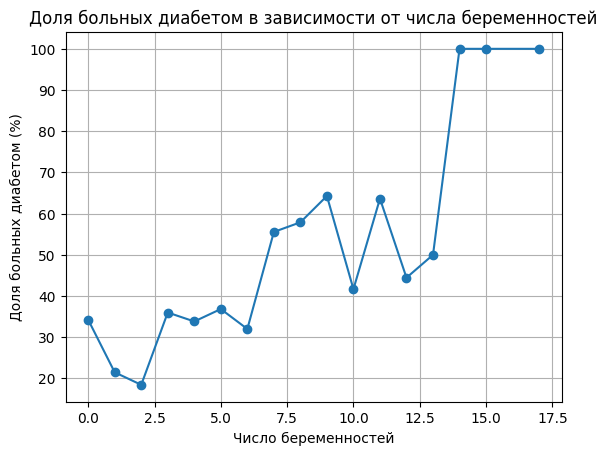

In [177]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
diabetes_percentage = pima.groupby('Pregnancies')['Class'].mean() * 100

plt.plot(diabetes_percentage.index, diabetes_percentage.values, marker='o')
plt.title('Доля больных диабетом в зависимости от числа беременностей')
plt.xlabel('Число беременностей')
plt.ylabel('Доля больных диабетом (%)')
plt.grid(True)
plt.show()


__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [80]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima['wasPregnant'] = 0
pima.loc[pima['Pregnancies'] > 0,'wasPregnant'] = 1


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [90]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
notPregnant = len(pima.query('wasPregnant == 0 & Class == 1')) / len(pima) * 100
yesPregnant = len(pima.query('wasPregnant == 1 & Class == 1')) / len(pima) * 100



print("Не были беременны: {:.2f}, были беременны: {:.2f}".format(notPregnant, yesPregnant))

Не были беременны: 4.95, были беременны: 29.95


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [91]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
def define_weight (kolonka):
    if kolonka <= 18.5:
        return 'Underweight'
    elif kolonka <= 24.9:
        return 'Normal weight'
    elif kolonka <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
    

pima['bodyType'] = pima['BMI'].apply(define_weight)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [93]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
healthy = pima.query('BloodPressure >= 80 & BloodPressure <= 89 & bodyType == "Normal weight"')
healthyButIll = pima.query('BloodPressure >= 80 & BloodPressure <= 89 & bodyType == "Normal weight" & Class == 1')

illPercent = len(healthyButIll) / len(healthy) * 100

In [96]:
print("Среди здоровых женщин болеет лишь {:.2f}%".format(illPercent))

Среди здоровых женщин болеет лишь 10.00%


# Датасет 2


In [165]:
babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)

In [166]:
babies

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет

2) Какое имя в датасете находится по индексом 121?

3) Cколько всего родилось детей по имени 'Aaron' за все время?

4) Насколько больше за все время родилось мальчиков чем девочек?

5) Cколько мальчиков родилось в 2010?

6) Сколько в датасете девочек по имени John?


In [174]:
# 1
babies['year'] = pd.to_numeric(babies['year'], errors='coerce')
print(f"Датасет включает в себя данные с {babies['year'].min()} по {babies['year'].max()} ")

Датасет включает в себя данные с 1880 по 2010 


In [168]:
# 2
babies.loc[121, 'name']

121       Ann
121      Anne
121     Josie
121      Lola
121     Hazel
        ...  
121       Eva
121     Naomi
121     Bella
121     Jenna
121    Nicole
Name: name, Length: 131, dtype: object

In [169]:
# 3
print("С именем 'Aaron' за всё время родилось {} детей".format(len(babies.query('name == "Aaron"'))))

С именем 'Aaron' за всё время родилось 212 детей


In [170]:
# 4
male = len(babies.query('sex == "M"'))
female = len(babies.query('sex == "F"'))

print(f"Девочек родилось больше на {female - male}")

Девочек родилось больше на 317186


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


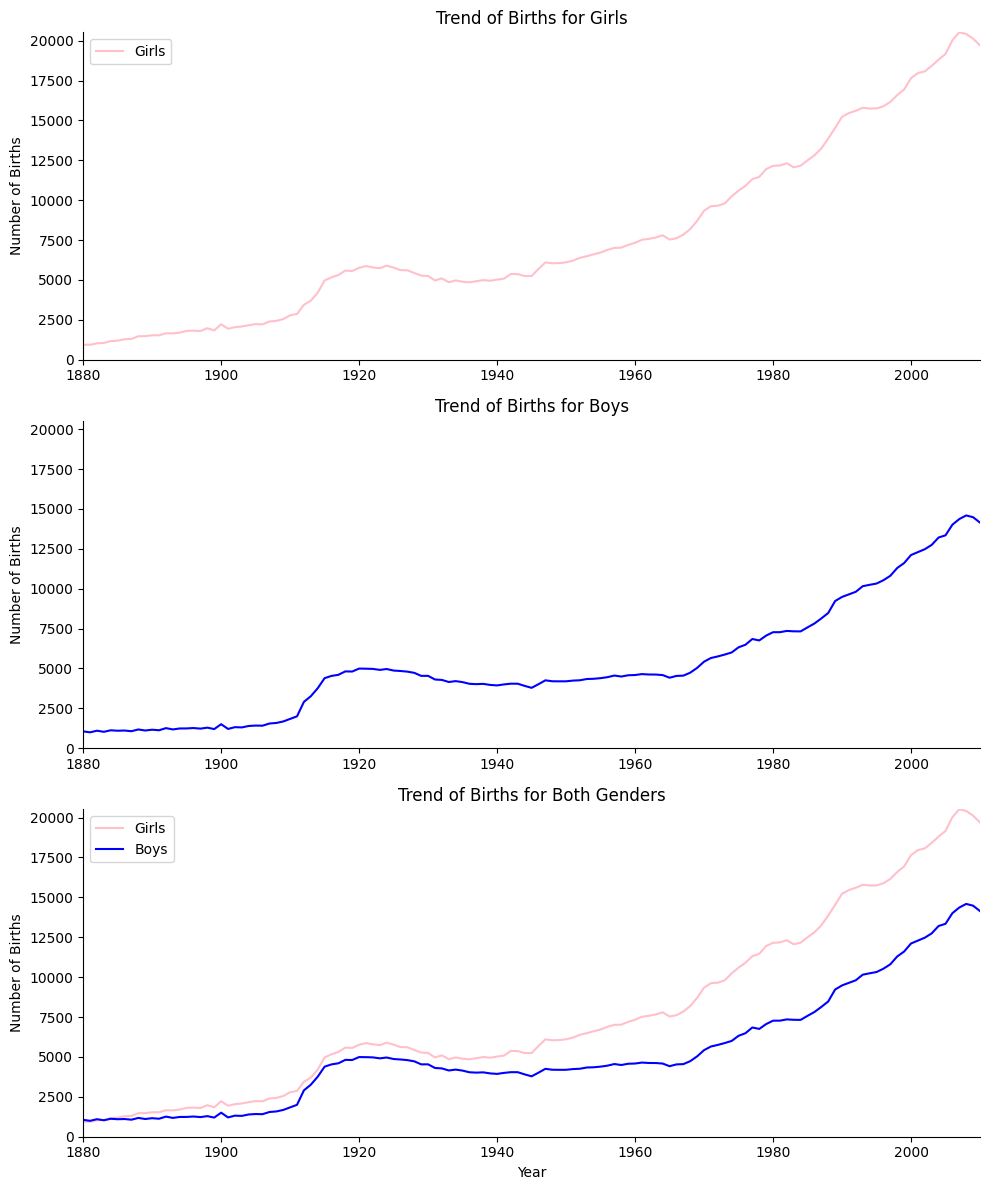

In [175]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
grouped_babies = babies.groupby(['year', 'sex']).size().unstack()

baby_girls = grouped_babies['F']
baby_boys = grouped_babies['M']

fig, axes = plt.subplots(nrows=3, figsize=(10, 12), sharex=True)

# для девочек
axes[0].plot(baby_girls.index, baby_girls.values, label='Girls', color='pink')
axes[0].set_title('Trend of Births for Girls')
axes[0].set_ylabel('Number of Births')
axes[0].legend()

# для мальчиков
axes[1].plot(baby_boys.index, baby_boys.values, label='Boys', color='blue')
axes[1].set_title('Trend of Births for Boys')
axes[1].set_ylabel('Number of Births')

# для обоих полов
axes[2].plot(baby_girls.index, baby_girls.values, label='Girls', color='pink')
axes[2].plot(baby_boys.index, baby_boys.values, label='Boys', color='blue')
axes[2].set_title('Trend of Births for Both Genders')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Births')
axes[2].legend()

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim(babies['year'].min(), babies['year'].max())  # Лимиты оси x
    ax.set_ylim(0, max(baby_girls.max(), baby_boys.max()))  # Лимиты оси y

plt.tight_layout()
plt.show()

Тренды восходящие, пик общей рождаемости соответствует пикам рождаемости как для девочек, так и для мальчиков. Снижение рождаемости к концу рассматриваемого периода является общим для обоих полов.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.

In [274]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
grouped_names = babies.groupby(['name', 'sex'])['number'].sum().unstack()

top_female_names = grouped_names['F'].nlargest(4).index
top_male_names = grouped_names['M'].nlargest(4).index


In [275]:
babies_alisa = {}
for name in top_female_names.union(top_male_names):
    babies_alisa[name] = babies[babies['name'] == name].pivot_table(index='year', columns='sex', values='number', fill_value=0)


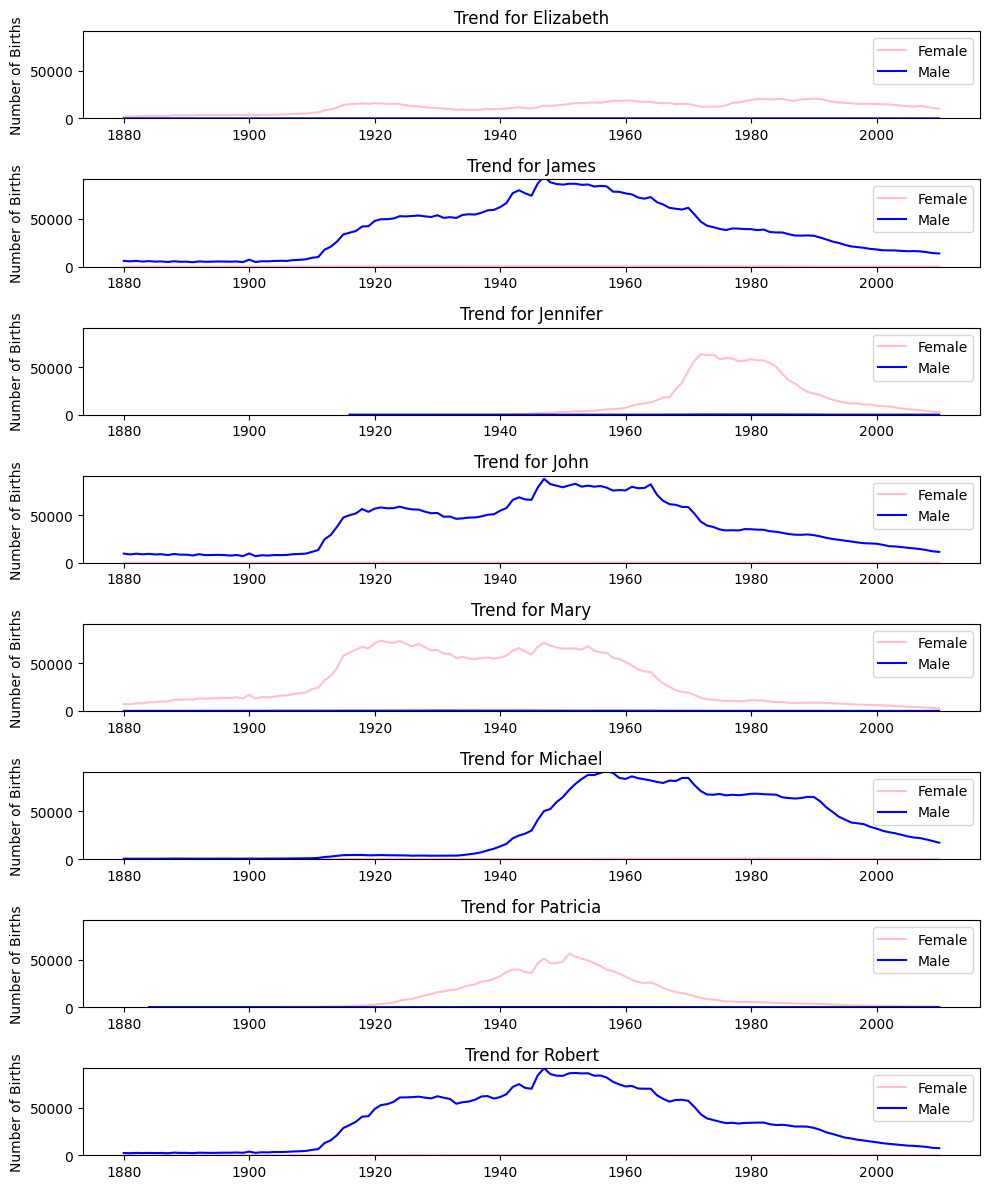

In [285]:
fig, axes = plt.subplots(nrows=8, figsize=(10, 12), sharex=True)

for ax, name in zip(axes, babies_alisa.keys()):
    df = babies_alisa[name]
    ax.plot(df.index, df['F'], label='Female', color='pink')
    ax.plot(df.index, df['M'], label='Male', color='blue')
    ax.set_title(f'Trend for {name}')
    ax.set_ylabel('Number of Births')
    ax.legend()

for ax in axes:
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylim(0, max(babies_alisa[name]['F'].max().max(), babies_alisa[name]['M'].max().max()))

plt.tight_layout()
plt.show()


Каждый тренд по своему уникален, но мы можем заметим несколько схожостей. Например, имена John, James, Robert начали активнее использовать с 1910 года. Имя Michael активно начало входить в обиход лишь с 1940 года. Года с 1950 по 1960 можно считать пиками для всех мужских имен из нашей выборки.

Среди женских имён стоит выделить имя Elizabeth, как наиболее спокойный тренд без пиковых значений. Имена Jennifer, Mary, Patricia имеют свои локальные пики в разный промежуток выремени. 

У всех имен, кроме Elizabeth, наблюдается нисходящий тренд в последние года. 